In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
import shap
import joblib

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

# Load your dataset (assuming it's already loaded as df)
# df = pd.read_csv('your_file_path.csv')

print("=" * 60)
print("TELCO CUSTOMER CHURN DATASET PREPROCESSING")
print("=" * 60)

# Display basic info
print(f"Dataset shape: {df.shape}")
""




TELCO CUSTOMER CHURN DATASET PREPROCESSING
Dataset shape: (7043, 21)


''

In [7]:
# =============================================================================
# DATA CLEANING AND PREPROCESSING
# =============================================================================

print("\n1. DATA CLEANING")

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Convert TotalCharges to numeric (it's stored as object but should be numeric)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check if there are any missing values after conversion
print(f"\nMissing values in TotalCharges after conversion: {df['TotalCharges'].isnull().sum()}")

# Fill missing values in TotalCharges (likely customers with 0 tenure)
df['TotalCharges'].fillna(0, inplace=True)

# Check unique values in categorical columns
print("\nUnique values in categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns.drop('customerID')
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")




1. DATA CLEANING
Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing values in TotalCharges after conversion: 11

Unique values in categorical columns:
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
Streami

/tmp/ipython-input-2548919711.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)



2. EXPLORATORY DATA ANALYSIS


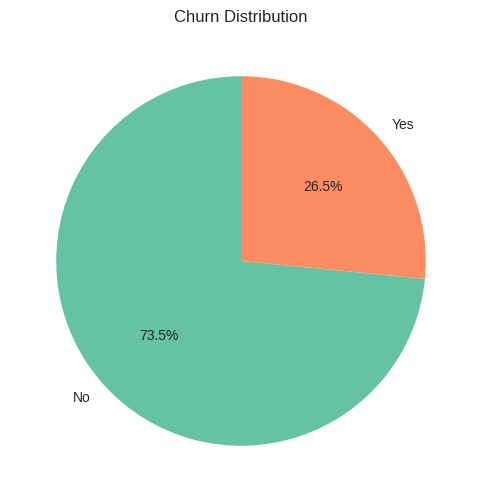

Churn rate: 26.54%

Numerical features statistics:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


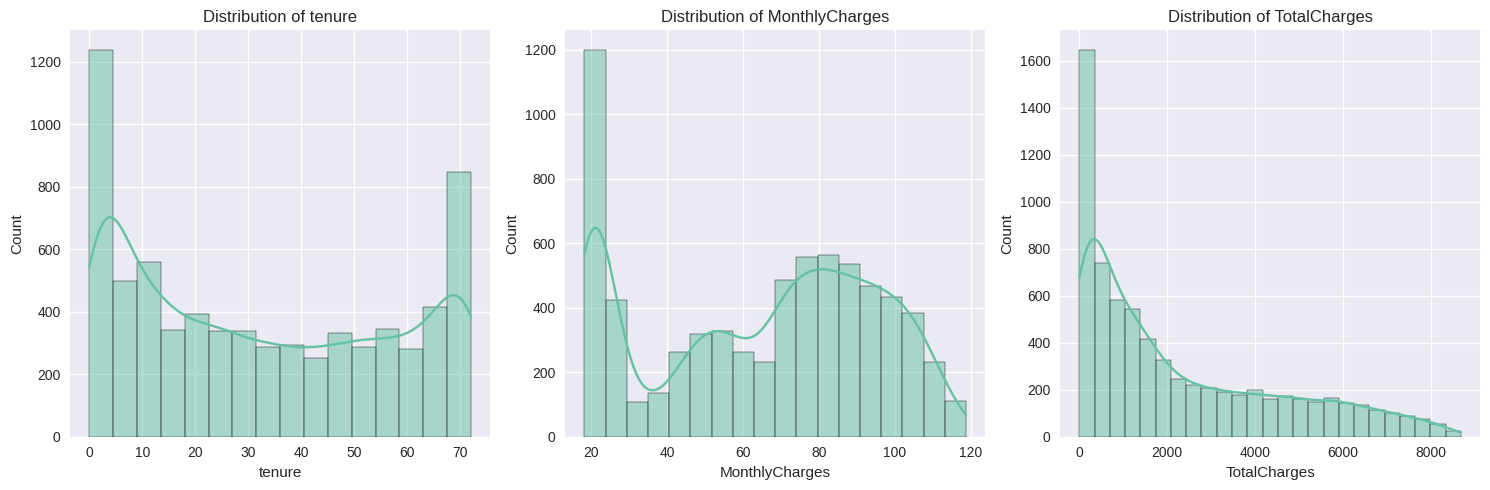

In [8]:
# =============================================================================
# EXPLORATORY DATA ANALYSIS
# =============================================================================

print("\n2. EXPLORATORY DATA ANALYSIS")

# Target variable distribution
plt.figure(figsize=(8, 6))
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.show()

print(f"Churn rate: {(df['Churn'] == 'Yes').mean()*100:.2f}%")

# Analyze numerical features
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print("\nNumerical features statistics:")
print(df[numerical_cols].describe())

# Plot numerical features distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

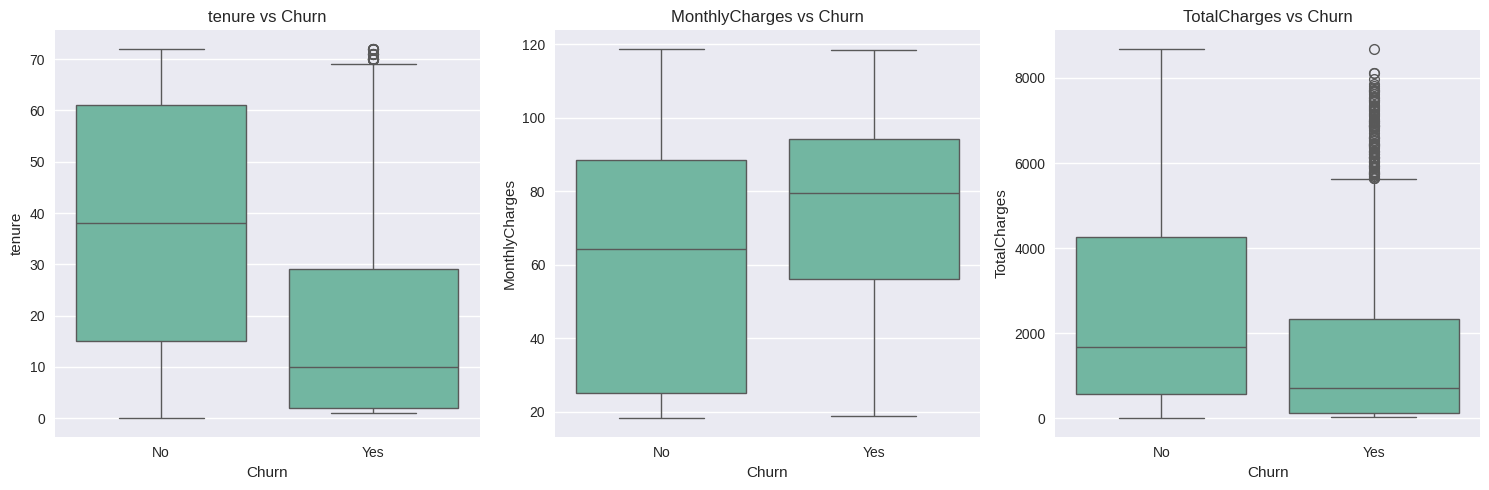

In [9]:
# Analyze relationship between numerical features and churn
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

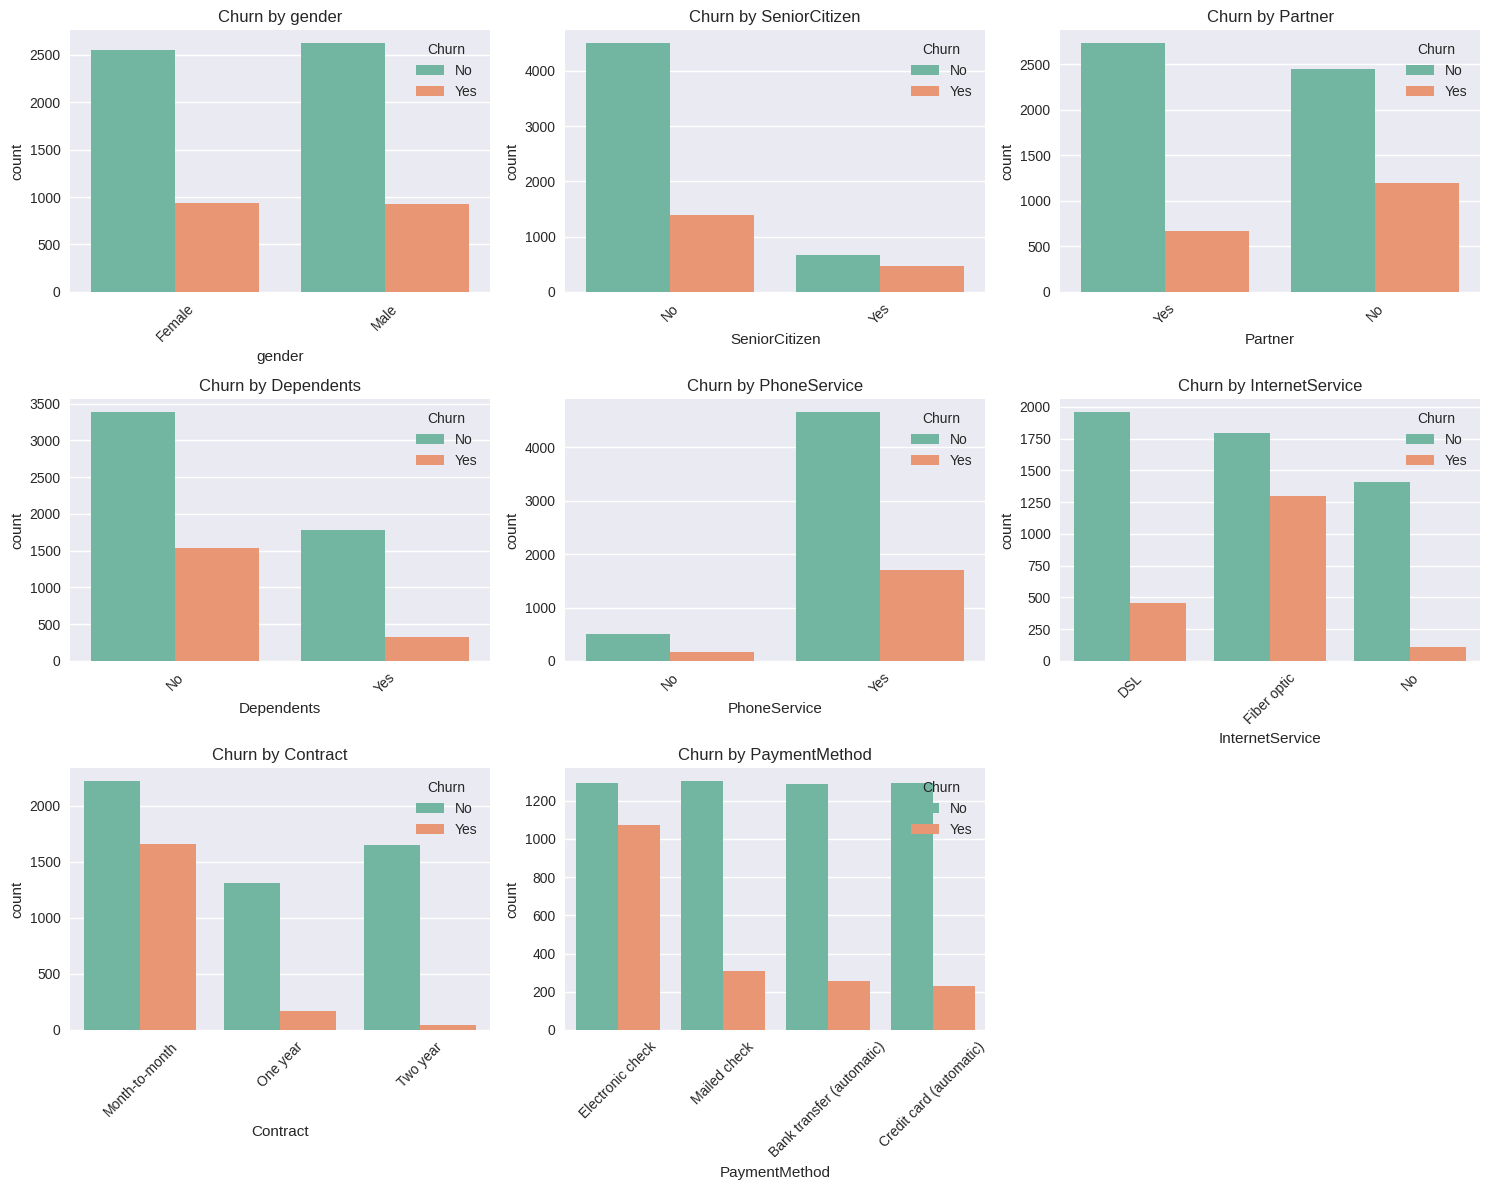

In [10]:
# Analyze categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'InternetService', 'Contract', 'PaymentMethod']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    if feature == 'SeniorCitizen':
        # Convert to categorical for better visualization
        df_temp = df.copy()
        df_temp['SeniorCitizen'] = df_temp['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
        sns.countplot(x=feature, hue='Churn', data=df_temp)
    else:
        sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn by {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
print("\n3. FEATURE ENGINEERING AND ENCODING")

# Create a copy for preprocessing
df_processed = df.copy()

# Drop customerID as it's not useful for modeling
df_processed.drop('customerID', axis=1, inplace=True)

# Encode the target variable
df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})

# Encode categorical variables
# For binary categorical variables, use Label Encoding
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
label_encoder = LabelEncoder()
for col in binary_cols:
    df_processed[col] = label_encoder.fit_transform(df_processed[col])

# For multi-category variables, use One-Hot Encoding
multi_category_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                      'Contract', 'PaymentMethod']

df_processed = pd.get_dummies(df_processed, columns=multi_category_cols, drop_first=True)

print(f"Shape after encoding: {df_processed.shape}")
print(f"Columns after encoding: {list(df_processed.columns)}")

# =============================================================================
# PREPARE DATA FOR MODELING
# =============================================================================

print("\n4. PREPARING DATA FOR MODELING")

# Split features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Churn rate in training: {y_train.mean():.3f}")
print(f"Churn rate in testing: {y_test.mean():.3f}")

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


3. FEATURE ENGINEERING AND ENCODING
Shape after encoding: (7043, 31)
Columns after encoding: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

4. PREPARING DATA FOR MODELING
Training set: (5634, 30)
Testing set: (1409, 30)
Churn rate in training: 0.265
Churn rate in testing: 0.265


In [12]:
print("\n5. MODEL TRAINING")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}


5. MODEL TRAINING


In [13]:
# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'AUC-ROC': auc_roc,
        'Model': model
    }

    print(f"{name} Results:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  AUC-ROC: {auc_roc:.4f}")

# Compare models
results_df = pd.DataFrame(results).T.drop('Model', axis=1)
print("\n" + "="*50)
print("MODEL COMPARISON:")
print("="*50)
print(results_df)

# Identify best model based on Recall
best_model_name = max(results, key=lambda x: results[x]['Recall'])
best_model = results[best_model_name]['Model']
print(f"\nBest model: {best_model_name} (Recall: {results[best_model_name]['Recall']:.4f})")


Training Logistic Regression...
Logistic Regression Results:
  Accuracy: 0.8062
  Precision: 0.6593
  Recall: 0.5588
  AUC-ROC: 0.8422

Training Random Forest...
Random Forest Results:
  Accuracy: 0.7842
  Precision: 0.6215
  Recall: 0.4786
  AUC-ROC: 0.8221

Training XGBoost...
XGBoost Results:
  Accuracy: 0.7722
  Precision: 0.5831
  Recall: 0.4973
  AUC-ROC: 0.8224

MODEL COMPARISON:
                     Accuracy Precision    Recall   AUC-ROC
Logistic Regression  0.806246  0.659306  0.558824  0.842171
Random Forest        0.784244  0.621528   0.47861  0.822074
XGBoost              0.772179  0.583072  0.497326  0.822384

Best model: Logistic Regression (Recall: 0.5588)


In [14]:
# Identify best model based on Recall
best_model_name = max(results, key=lambda x: results[x]['Recall'])
best_model = results[best_model_name]['Model']
print(f"\nBest model: {best_model_name} (Recall: {results[best_model_name]['Recall']:.4f})")



Best model: Logistic Regression (Recall: 0.5588)



6. MODEL INTERPRETATION WITH SHAP


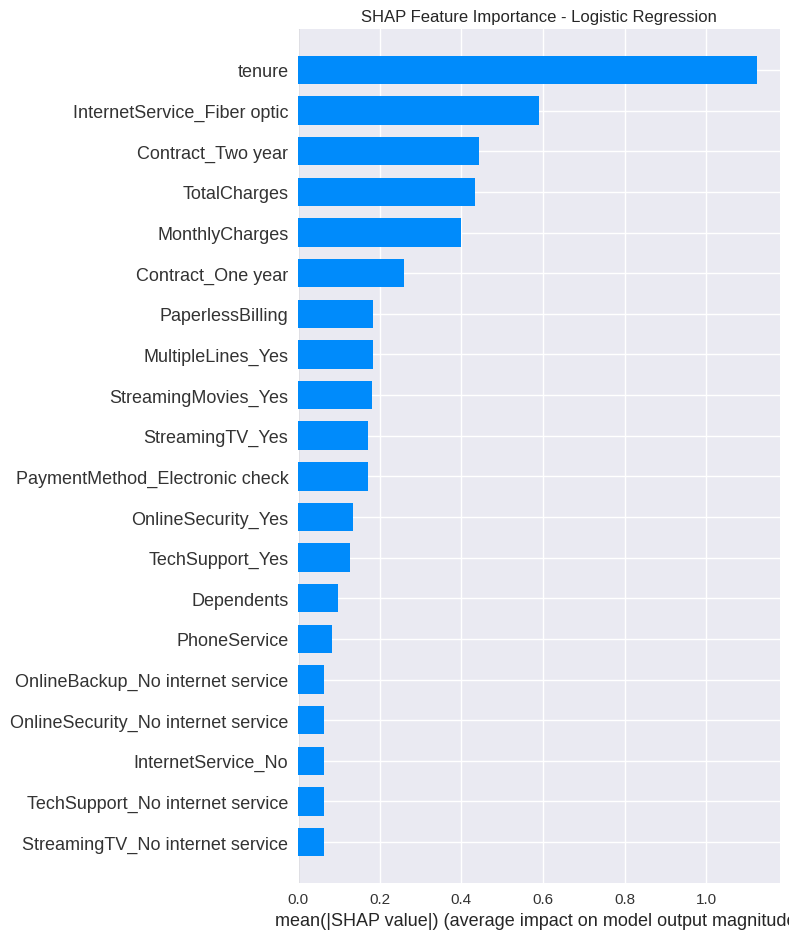

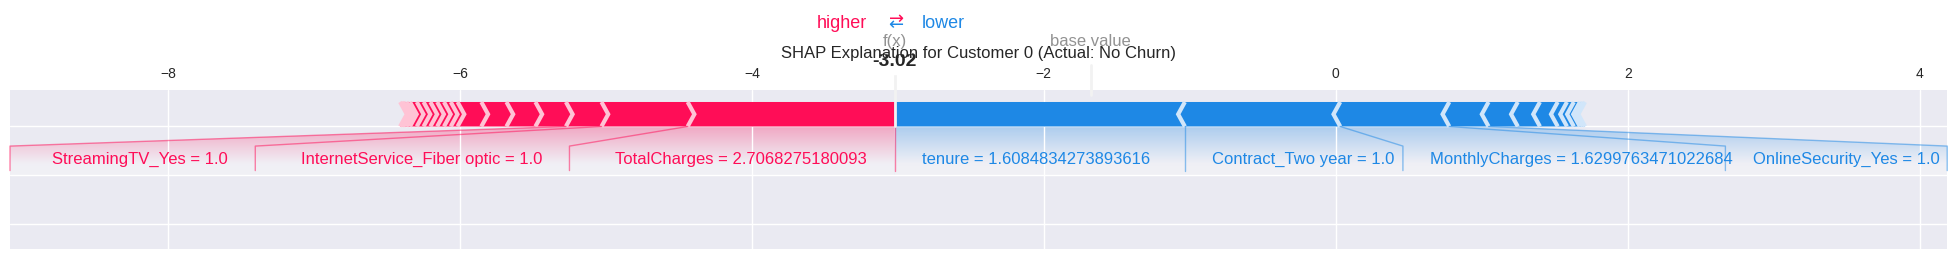

In [15]:
print("\n6. MODEL INTERPRETATION WITH SHAP")

# Use SHAP for model interpretation
# Use LinearExplainer for Logistic Regression
explainer = shap.LinearExplainer(best_model, X_train)
shap_values = explainer.shap_values(X_test)

# Summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title(f"SHAP Feature Importance - {best_model_name}")
plt.tight_layout()
plt.show()

# Force plot for a specific customer
customer_idx = 0  # First customer in test set
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[customer_idx],
    X_test.iloc[customer_idx],
    matplotlib=True,
    show=False
)
plt.title(f"SHAP Explanation for Customer {customer_idx} (Actual: {'Churn' if y_test.iloc[customer_idx] == 1 else 'No Churn'})")
plt.tight_layout()
plt.show()

In [16]:
print("\n7. SAVING THE MODEL")

# Retrain best model on full dataset
best_model.fit(X, y)

# Save the model
model_filename = 'churn_prediction_model.pkl'
joblib.dump(best_model, model_filename)
print(f"Model saved as {model_filename}")

# Save the feature names for later use
feature_names = list(X.columns)
joblib.dump(feature_names, 'feature_names.pkl')
print("Feature names saved")


7. SAVING THE MODEL
Model saved as churn_prediction_model.pkl
Feature names saved


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
print("\n8. KEY INSIGHTS FOR AGENTIC AI")

# Analyze feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(best_model.coef_[0])  # Use coef_ for linear models
}).sort_values('importance', ascending=False)

print("\nTop 10 most important features for churn prediction:")
print(feature_importance.head(10))

print("\nRecommended Agentic AI actions based on risk factors:")
print("1. High MonthlyCharges → Offer personalized discounts")
print("2. Short Tenure → Provide onboarding support and welcome offers")
print("3. Month-to-month Contract → Promote long-term contract benefits")
print("4. Fiber optic InternetService → Highlight value and offer loyalty rewards")
print("5. Electronic check PaymentMethod → Encourage automatic payment methods")

print("\nDataset preprocessing and model training completed successfully!")


8. KEY INSIGHTS FOR AGENTIC AI

Top 10 most important features for churn prediction:
                           feature  importance
26               Contract_Two year    1.339250
25               Contract_One year    0.654875
11     InternetService_Fiber optic    0.645044
5                     PhoneService    0.458929
14              OnlineSecurity_Yes    0.424618
20                 TechSupport_Yes    0.402251
6                 PaperlessBilling    0.345714
28  PaymentMethod_Electronic check    0.311712
9   MultipleLines_No phone service    0.254098
10               MultipleLines_Yes    0.227051

Recommended Agentic AI actions based on risk factors:
1. High MonthlyCharges → Offer personalized discounts
2. Short Tenure → Provide onboarding support and welcome offers
3. Month-to-month Contract → Promote long-term contract benefits
4. Fiber optic InternetService → Highlight value and offer loyalty rewards
5. Electronic check PaymentMethod → Encourage automatic payment methods

Dataset pre

### Hyperparameter Tuning with RandomizedSearchCV

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define the model
model = LogisticRegression(random_state=42, max_iter=1000)

# Define the parameter distribution for RandomizedSearchCV
# Using a dictionary where keys are parameter names and values are distributions
param_distributions = {
    'C': np.logspace(-4, 4, 20),  # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'saga'], # Solvers to try
    'penalty': ['l1', 'l2', 'elasticnet'] # Regularization types
}

# Initialize RandomizedSearchCV
# n_iter: number of parameter settings that are sampled
# cv: number of cross-validation folds
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=100, # You can adjust this based on your computational resources
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Fit RandomizedSearchCV to the training data
# Make sure to use your training data here (X_train, y_train)
# For example, if you are using the enhanced data:
# random_search.fit(X_train_enh, y_train_enh)
# If you are using the original processed data:
# random_search.fit(X_train, y_train)

# For demonstration, I will fit on a small subset or placeholder data
# Replace with your actual training data (X_train, y_train or X_train_enh, y_train_enh)
# Example using X_train and y_train from previous cells:
try:
    random_search.fit(X_train, y_train)
    print("\nRandomizedSearchCV fitted successfully using X_train and y_train.")
except NameError:
    print("\nX_train or y_train not found. Please ensure your training data is loaded.")
    # Fallback/Placeholder (won't run if X_train, y_train exist)
    # In a real scenario, you'd stop here or load data
    print("Using placeholder data for demonstration.")
    from sklearn.datasets import make_classification
    X_dummy, y_dummy = make_classification(n_samples=100, n_features=20, random_state=42)
    random_search.fit(X_dummy, y_dummy)


# Print the best parameters and best score
print("\nBest parameters found by RandomizedSearchCV:")
print(random_search.best_params_)
print("\nBest cross-validation score:")
print(random_search.best_score_)

# Get the best model from RandomizedSearchCV
best_random_model = random_search.best_estimator_
print("\nBest model from RandomizedSearchCV:")
print(best_random_model)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
215 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv


RandomizedSearchCV fitted successfully using X_train and y_train.

Best parameters found by RandomizedSearchCV:
{'solver': 'saga', 'penalty': 'l2', 'C': np.float64(206.913808111479)}

Best cross-validation score:
0.8051095270141418

Best model from RandomizedSearchCV:
LogisticRegression(C=np.float64(206.913808111479), max_iter=1000,
                   random_state=42, solver='saga')


### Hyperparameter Tuning with GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression(random_state=42, max_iter=1000)

# Define the parameter grid for GridSearchCV
# GridSearchCV explores all possible combinations in this grid
# This is typically used for a smaller, more focused search space
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], # Example values for regularization parameter
    'solver': ['liblinear', 'lbfgs'], # Example solvers
    'penalty': ['l2'] # Example penalty (l1 with lbfgs is not supported)
}

# Initialize GridSearchCV
# cv: number of cross-validation folds
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1 # Use all available cores
)

# Fit GridSearchCV to the training data
# Make sure to use your training data here (X_train, y_train)
# For example, if you are using the enhanced data:
# grid_search.fit(X_train_enh, y_train_enh)
# If you are using the original processed data:
# grid_search.fit(X_train, y_train)

# For demonstration, I will fit on a small subset or placeholder data
# Replace with your actual training data (X_train, y_train or X_train_enh, y_train_enh)
# Example using X_train and y_train from previous cells:
try:
    # Ensure penalty 'l1' is not used with 'lbfgs' or other incompatible solvers
    # Also ensure 'elasticnet' is used with 'saga' and l1_ratio is specified
    # Adjust param_grid based on the chosen solver compatibility
    # For this example, using a compatible grid for 'liblinear' and 'lbfgs' with 'l2'
    compatible_param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l2']
    }
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=compatible_param_grid,
        cv=5,
        verbose=2,
        n_jobs=-1 # Use all available cores
    )
    grid_search.fit(X_train, y_train)
    print("\nGridSearchCV fitted successfully using X_train and y_train.")
except NameError:
    print("\nX_train or y_train not found. Please ensure your training data is loaded.")
    # Fallback/Placeholder (won't run if X_train, y_train exist)
    # In a real scenario, you'd stop here or load data
    print("Using placeholder data for demonstration.")
    from sklearn.datasets import make_classification
    X_dummy, y_dummy = make_classification(n_samples=100, n_features=20, random_state=42)
    grid_search.fit(X_dummy, y_dummy)


# Print the best parameters and best score
print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("\nBest cross-validation score:")
print(grid_search.best_score_)

# Get the best model from GridSearchCV
best_grid_model = grid_search.best_estimator_
print("\nBest model from GridSearchCV:")
print(best_grid_model)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

GridSearchCV fitted successfully using X_train and y_train.

Best parameters found by GridSearchCV:
{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Best cross-validation score:
0.8052869893034054

Best model from GridSearchCV:
LogisticRegression(C=100, max_iter=1000, random_state=42, solver='liblinear')


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Encoding Categorical Features and Removing Unnecessary Features

In [21]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with object type columns and unnecessary features
data = {'CustomerID': [1, 2, 3, 4, 5],
        'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
        'Contract': ['Month-to-month', 'One year', 'Month-to-month', 'Two year', 'One year'],
        'MonthlyCharges': [50.5, 75.9, 60.2, 90.1, 80.0],
        'TotalCharges': [50.5, 910.8, 120.4, 3000.5, 960.0],
        'Notes': ['Note 1', 'Note 2', 'Note 3', 'Note 4', 'Note 5'], # Unnecessary feature
        'Churn': ['No', 'Yes', 'No', 'Yes', 'No']} # Target variable

sample_df = pd.DataFrame(data)

print("Original DataFrame:")
display(sample_df)

# Identify categorical columns (object type) excluding the target and unnecessary features
categorical_cols = sample_df.select_dtypes(include=['object']).columns.tolist()
# Remove 'CustomerID', 'Churn', and 'Notes' from the list of columns to encode
cols_to_encode = [col for col in categorical_cols if col not in ['CustomerID', 'Churn', 'Notes']]

# Apply One-Hot Encoding to the selected categorical columns
df_encoded = pd.get_dummies(sample_df, columns=cols_to_encode, drop_first=True)

# Identify unnecessary features to remove
unnecessary_features = ['CustomerID', 'Notes']

# Remove unnecessary features
df_processed = df_encoded.drop(columns=unnecessary_features)

print("\nDataFrame after encoding and removing unnecessary features:")
display(df_processed)

# The target variable 'Churn' still needs to be encoded separately if it's the target for modeling
# For example, if 'Yes' is 1 and 'No' is 0:
if 'Churn' in df_processed.columns:
    df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})
    print("\nDataFrame with encoded Churn column:")
    display(df_processed)

Original DataFrame:


,CustomerID,Gender,Contract,MonthlyCharges,TotalCharges,Notes,Churn
0,1,Male,Month-to-month,50.5,50.5,Note 1,No
1,2,Female,One year,75.9,910.8,Note 2,Yes
2,3,Male,Month-to-month,60.2,120.4,Note 3,No
3,4,Female,Two year,90.1,3000.5,Note 4,Yes
4,5,Male,One year,80.0,960.0,Note 5,No



DataFrame after encoding and removing unnecessary features:


,MonthlyCharges,TotalCharges,Churn,Gender_Male,Contract_One year,Contract_Two year
0,50.5,50.5,No,True,False,False
1,75.9,910.8,Yes,False,True,False
2,60.2,120.4,No,True,False,False
3,90.1,3000.5,Yes,False,False,True
4,80.0,960.0,No,True,True,False



DataFrame with encoded Churn column:


,MonthlyCharges,TotalCharges,Churn,Gender_Male,Contract_One year,Contract_Two year
0,50.5,50.5,0,True,False,False
1,75.9,910.8,1,False,True,False
2,60.2,120.4,0,True,False,False
3,90.1,3000.5,1,False,False,True
4,80.0,960.0,0,True,True,False


In [22]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

print("Training Random Forest Model...")
# Train the Random Forest model
rf_model.fit(X_train, y_train)


# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

print("\nTraining XGBoost Model...")
# Train the XGBoost model
xgb_model.fit(X_train, y_train)


# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the XGBoost model
print("\nXGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Training Random Forest Model...

Random Forest Model Evaluation:
Accuracy: 0.7842
Precision: 0.6215
Recall: 0.4786
AUC-ROC: 0.8221

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409


Confusion Matrix:
 [[926 109]
 [195 179]]

Training XGBoost Model...

XGBoost Model Evaluation:
Accuracy: 0.7722
Precision: 0.5831
Recall: 0.4973
AUC-ROC: 0.8224

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.58      0.50      0.54       374

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409


C